## Bike Sharnig Analysis
## Introdction
These days bike is becoming popular as people are using it more and more for recreation. Also, bike riding is becoming part of a healthy lifestyle as well. Even the government promote bike ridership to reduces traffic. This dataset given contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information.

## Goals
In this project, I will try to find answers to:

what is disturbition of bike renting during weekday and seasons.

What seasons whould people most likely to rent bikes?

what type of users are they for bike renting?

when people are most likely renting the bike

What causes the bike renting rate increase?

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
hour_df = pd.read_csv("/Users/yuguixiaobai/course-project-solo_6007/data/raw/hour.csv")
df


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [54]:

hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)


hour_df['datetime'] = pd.to_datetime(hour_df.datetime)


hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [55]:
sns.set_style('darkgrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

[Text(0.5, 1.0, 'Season hourly distribution of counts')]

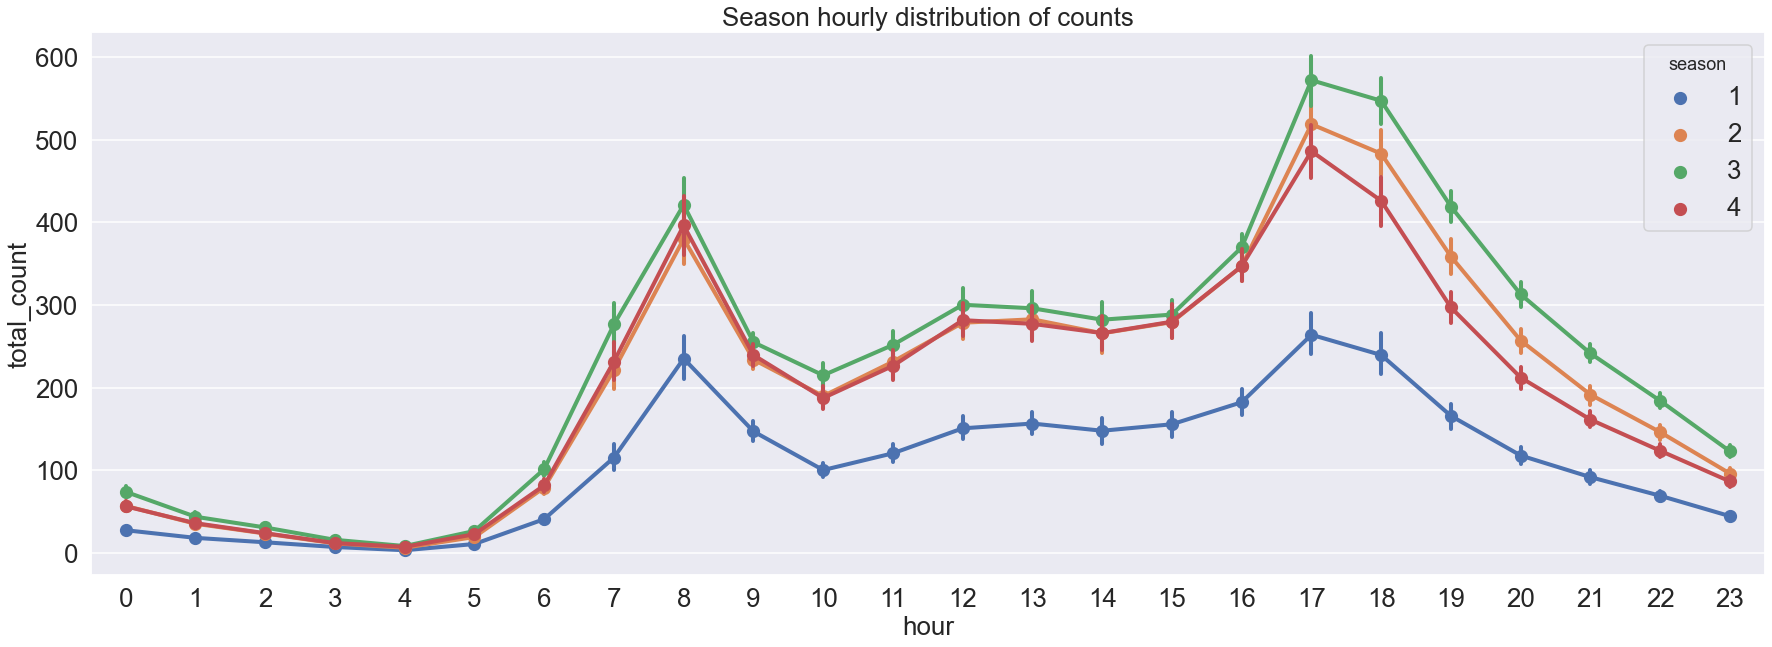

In [58]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'total_count',
                           'season']],
              x='hour',
              y='total_count',
              hue='season',
              ax=ax)
ax.set(title="Season hourly distribution of counts")

[Text(0.5, 1.0, 'Weekday hourly distribution of counts')]

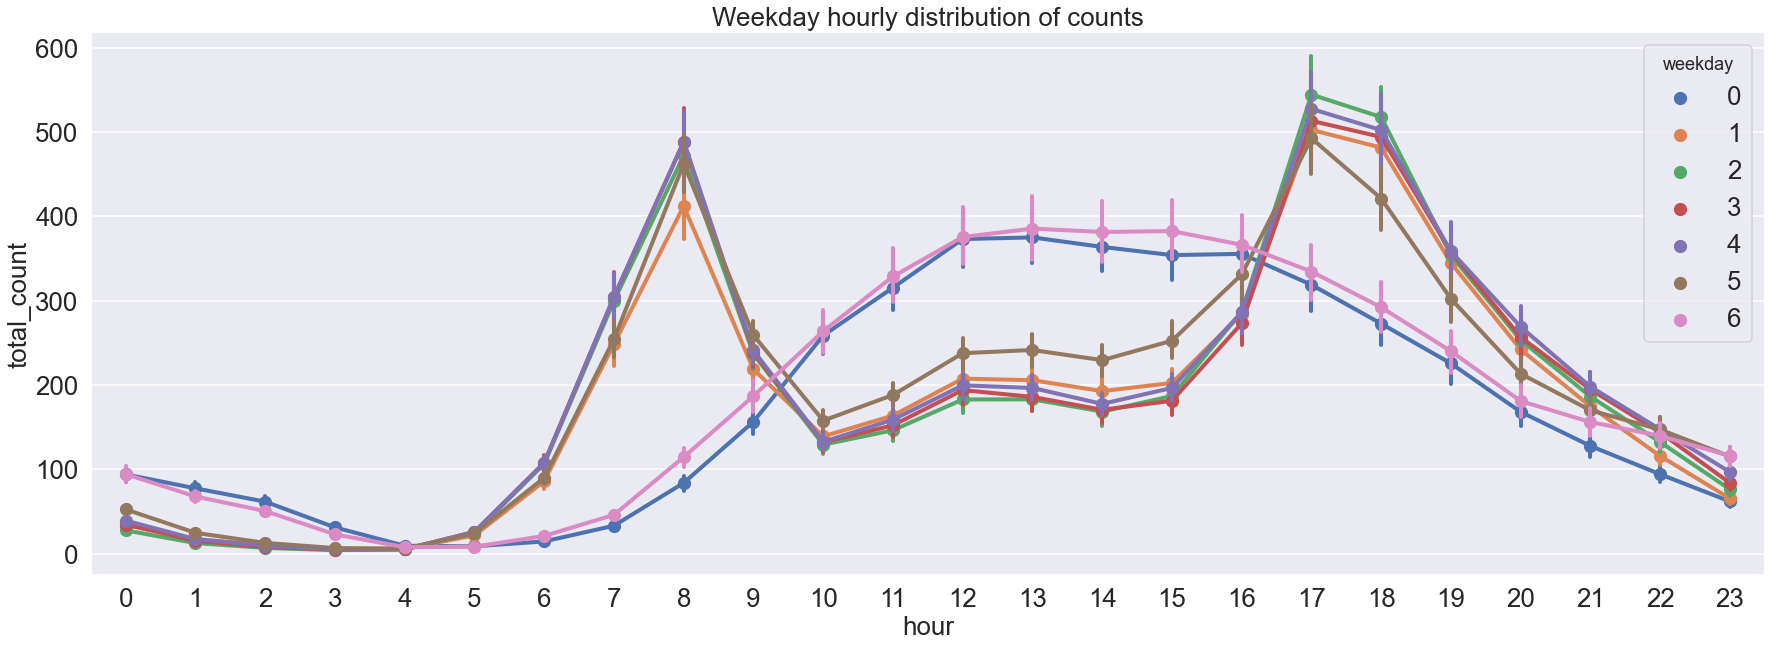

In [59]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'total_count',
                           'weekday']],
              x='hour',
              y='total_count',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday hourly distribution of counts")


[Text(0.5, 1.0, 'Monthly distribution of counts')]

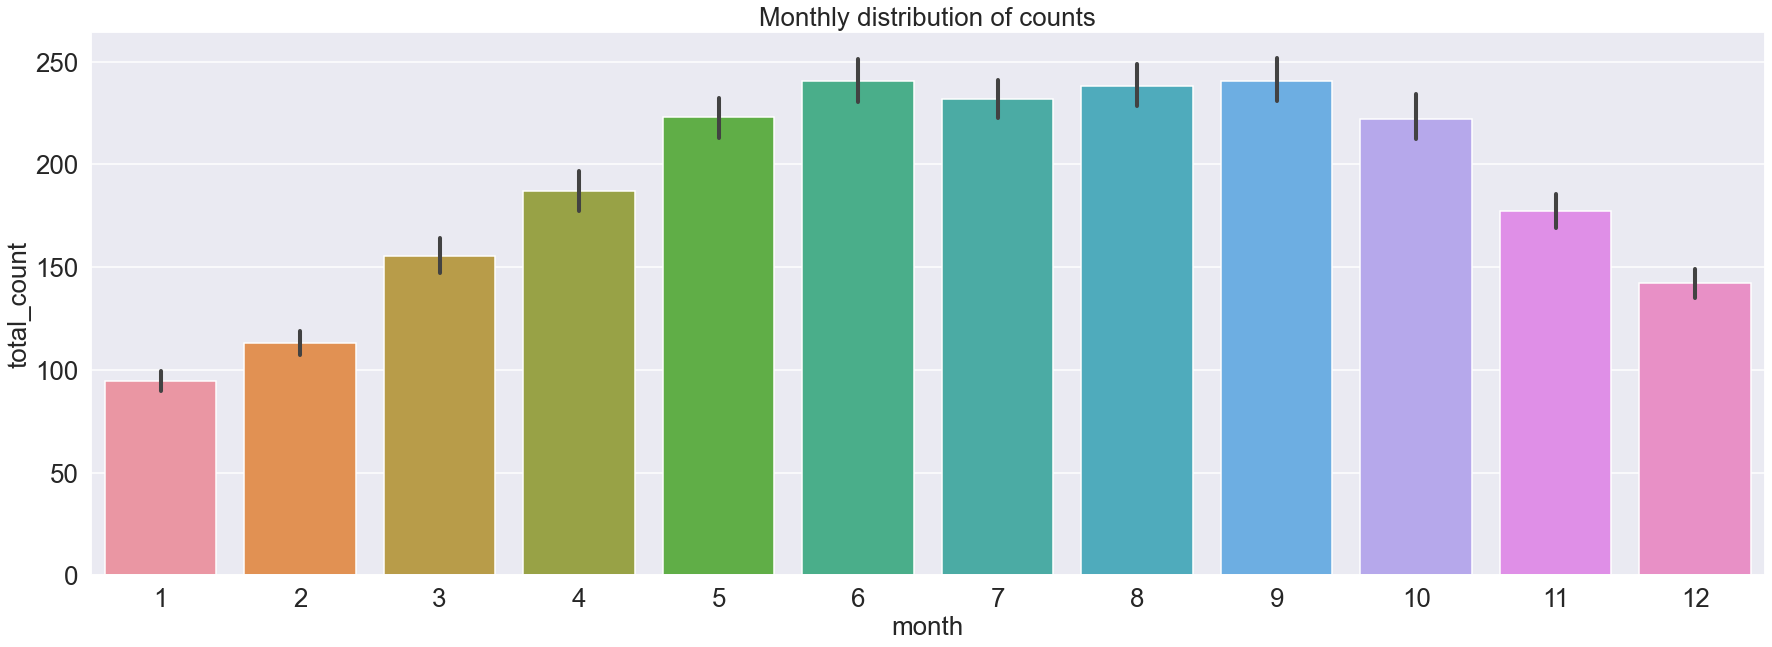

In [44]:
fig,ax = plt.subplots()
sns.barplot(data=hour_df[['month',
                           'total_count']],
              x='month',
              y='total_count',
              ax=ax)
ax.set(title="Monthly distribution of counts")

[Text(0.5, 1.0, 'Seasonal distribution of counts')]

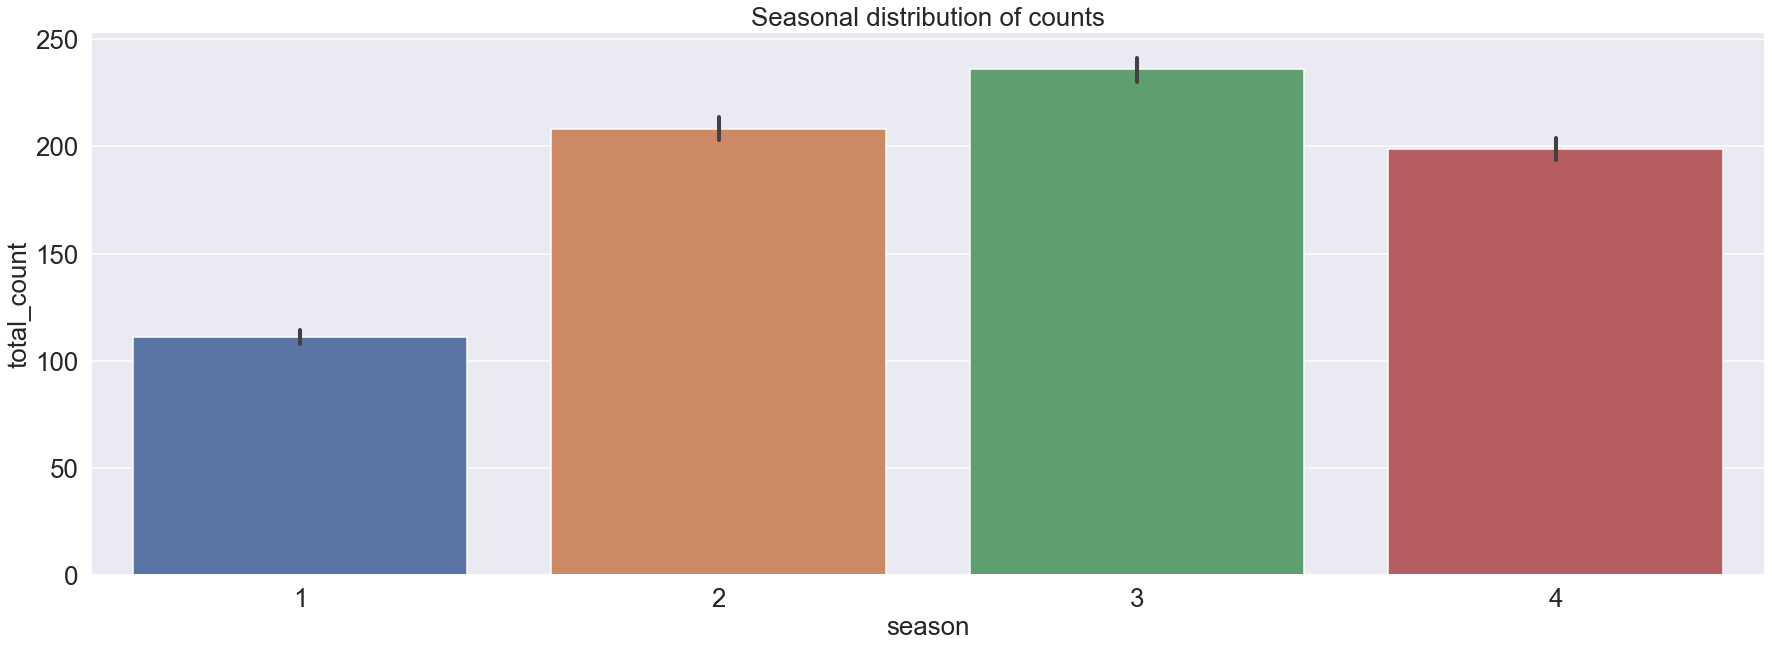

In [45]:
fig,ax = plt.subplots()
sns.barplot(data=hour_df[['season',
                           'total_count']],
              x='season',
              y='total_count',
              ax=ax)
ax.set(title="Seasonal distribution of counts")

[Text(0.5, 1.0, 'Types of counts')]

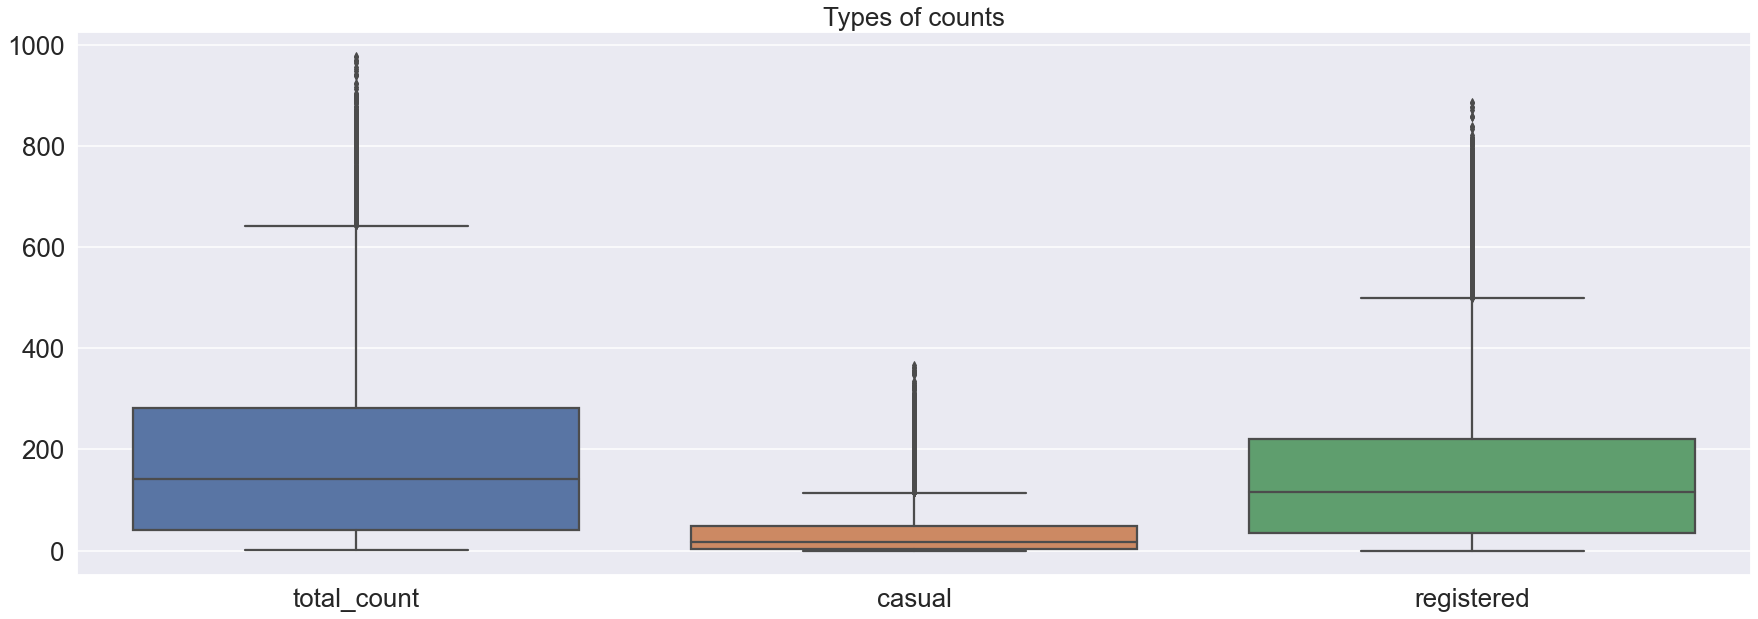

In [68]:
fig,ax = plt.subplots()
sns.boxplot(data=hour_df[['total_count',
                          'casual',
                          'registered']],ax=ax)
ax.set(title="Types of counts")


[Text(0.5, 1.0, 'Checking for outliners in day hours')]

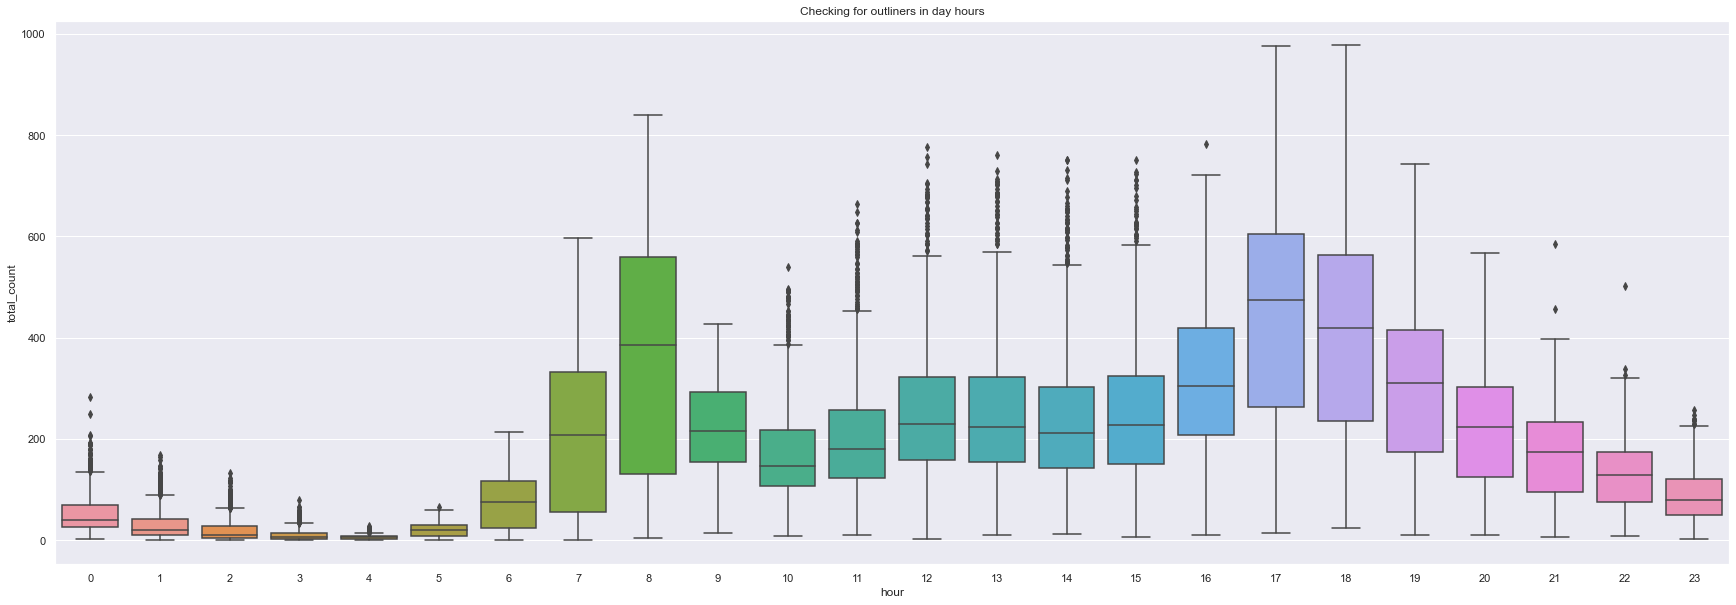

In [71]:
fig,ax = plt.subplots()
sns.boxplot(data=hour_df[['total_count',
                          'hour']],x='hour',y='total_count',ax=ax)
ax.set(title="Checking for outliners in day hours")

[Text(0.5, 1.0, 'Box Plot On Count Across Temperture')]

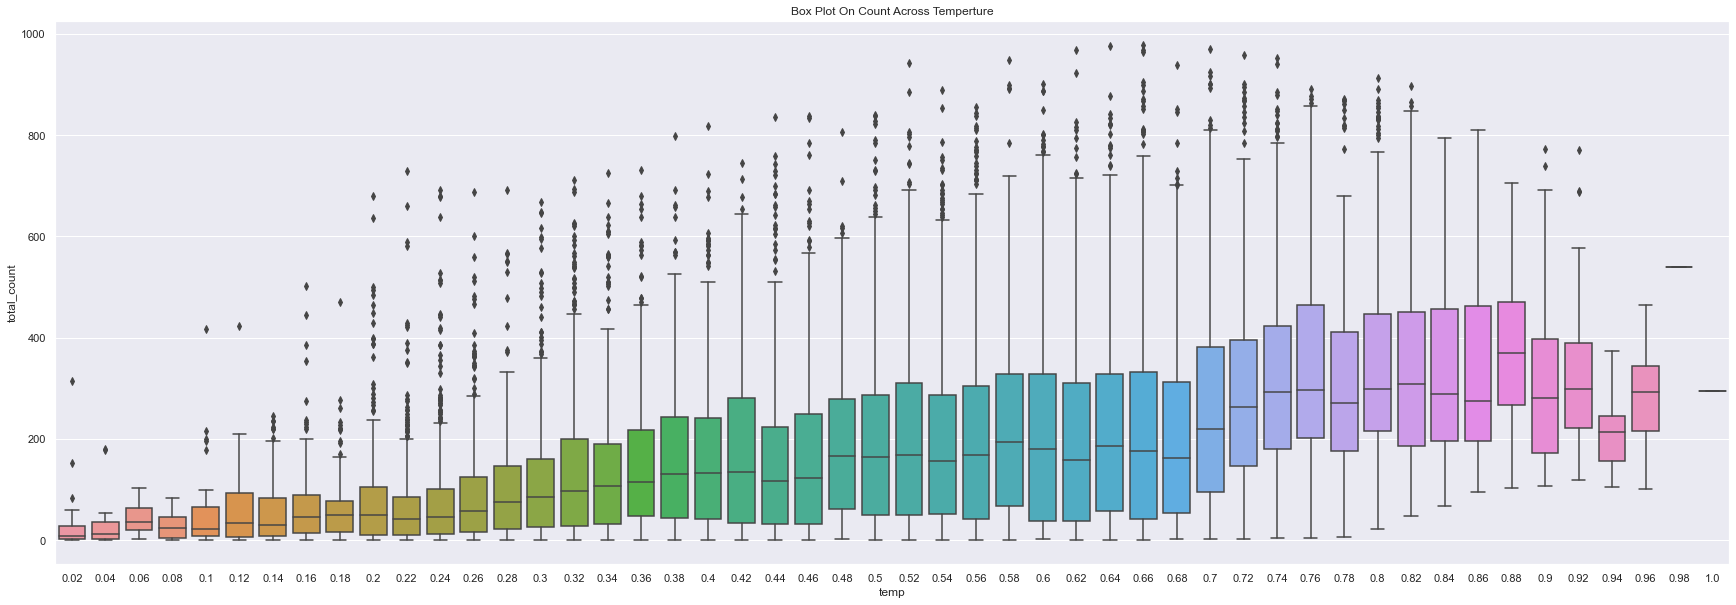

In [73]:
fig,ax = plt.subplots()
sns.boxplot(data=hour_df[['total_count',
                          'temp']],x='temp',y='total_count',ax=ax)
ax.set(title="Box Plot On Count Across Temperture")


## Conclusion for graphs above 
Those results below are also answering the questions for my project goals.

## The Pointplots
The pointplots indicate the disturbition of bike renting during weekday and seasons.both graphs show there are two peak point of bike renting time at 8 am and 5 pm. This message indicates that most users of the bicycle rental service use the bikes to get to work or school in weekday and during the year of seasons.

## The Barplots
The barplots indicate the disturbition of bike renting during monthes and seasons. Frist barplot shows people most likely to rent bikes during May-October.Second barplot shows that the third season which is autumn is the highest bike renting season.

## The boxplot for type of counts
This plot indicate the type of bike renting. most of bikes are rented by the registerd users 
so those people are the members of bike renting program.

## The boxplot for day hours outiler
This plot is also a evidence that shows there is a local maximum at 8 am and one at 5 pm which indicates that most users of the bicycle rental service

## The boxplot on count across temperture
 This boxplot indicates that higher temperatures lead to an increasing number of bike rents and lower temperatures not only decrease the average number of rents but also shows more outliers in the data.